## Sudan Displacement Tracking Matrix (DTM) Analysis:

### 1- Admin1 Level:
  #### - Requerments

In [1]:
#Import the libraries
import geopandas as gpd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
from matplotlib.patches import Patch
import mplcursors
import altair as alt

In [2]:
#read the data from the Github
data=pd.read_csv('https://raw.githubusercontent.com/fayam1/Sudat-DTM-Analysis/main/Data/Sudan_IDPs_admin1_final.csv')
#Remove the spaces from columns names
data.columns = data.columns.str.strip()
print(data.columns)
data.head(5)

Index(['State_Of_Displacement', 'State_Code', 'IDPs', 'HHs', 'Sudanes',
       'Non_Sudanes', 'Year', 'Month', 'State_Of_Origin',
       'IDPs_by_State_Of_Origin', 'State_origin_Code'],
      dtype='object')


,State_Of_Displacement,State_Code,IDPs,HHs,Sudanes,Non_Sudanes,Year,Month,State_Of_Origin,IDPs_by_State_Of_Origin,State_origin_Code
0,Aj Jazirah,SD15,371177,73323,371177,0,2024,Apr,Aj Jazirah,170306,SD15
1,Blue Nile,SD08,147736,29836,147241,495,2024,Apr,Aj Jazirah,24110,SD15
2,Central Darfur,SD06,430224,86044,430224,0,2024,Apr,Aj Jazirah,0,SD15
3,East Darfur,SD05,660140,131918,660140,0,2024,Apr,Aj Jazirah,400,SD15
4,Gedaref,SD12,492293,97817,484758,7535,2024,Apr,Aj Jazirah,148688,SD15


In [13]:
# Subset dataframe by year
selected_year=2024
df_selected_year =data[data.Year == selected_year]
df_selected_year



,State_Of_Displacement,State_Code,IDPs,HHs,Sudanes,Non_Sudanes,Year,Month,State_Of_Origin,IDPs_by_State_Of_Origin,State_origin_Code
0,Aj Jazirah,SD15,371177,73323,371177,0,2024,Apr,Aj Jazirah,170306,SD15
1,Blue Nile,SD08,147736,29836,147241,495,2024,Apr,Aj Jazirah,24110,SD15
2,Central Darfur,SD06,430224,86044,430224,0,2024,Apr,Aj Jazirah,0,SD15
3,East Darfur,SD05,660140,131918,660140,0,2024,Apr,Aj Jazirah,400,SD15
4,Gedaref,SD12,492293,97817,484758,7535,2024,Apr,Aj Jazirah,148688,SD15
...,...,...,...,...,...,...,...,...,...,...,...
859,South Darfur,SD03,140623,703118,703118,0,2024,Jan,White Nile,0,SD09
860,South Kordofan,SD07,25012,127637,126895,742,2024,Jan,White Nile,109,SD09
861,West Darfur,SD04,25708,128540,128540,0,2024,Jan,White Nile,0,SD09
862,West Kordofan,SD18,19813,101030,101030,0,2024,Jan,White Nile,0,SD09


In [14]:
# Subset dataframe by year and month
selected_year = 2024
selected_month='Apr'
#df_selected_year_month =data[data.Year == selected_year & data[data.Month==selected_month]]
df_selected_year_month = data[(data['Year'] == selected_year) & (data['Month'] == selected_month)]

df_selected_year_month

,State_Of_Displacement,State_Code,IDPs,HHs,Sudanes,Non_Sudanes,Year,Month,State_Of_Origin,IDPs_by_State_Of_Origin,State_origin_Code
0,Aj Jazirah,SD15,371177,73323,371177,0,2024,Apr,Aj Jazirah,170306,SD15
1,Blue Nile,SD08,147736,29836,147241,495,2024,Apr,Aj Jazirah,24110,SD15
2,Central Darfur,SD06,430224,86044,430224,0,2024,Apr,Aj Jazirah,0,SD15
3,East Darfur,SD05,660140,131918,660140,0,2024,Apr,Aj Jazirah,400,SD15
4,Gedaref,SD12,492293,97817,484758,7535,2024,Apr,Aj Jazirah,148688,SD15
...,...,...,...,...,...,...,...,...,...,...,...
211,South Darfur,SD03,744243,148848,744243,0,2024,Apr,White Nile,0,SD09
212,South Kordofan,SD07,198839,39492,198097,742,2024,Apr,White Nile,149,SD09
213,West Darfur,SD04,174540,34908,174540,0,2024,Apr,White Nile,0,SD09
214,West Kordofan,SD18,148718,29340,148718,0,2024,Apr,White Nile,0,SD09


In [15]:
# Calculate the total number of IDPs by State_Of_Origin and year
month_order = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

total_idps_by_State_Of_Origin_selected_year = df_selected_year.groupby(['State_origin_Code','State_Of_Origin','Year','Month']).agg({
'IDPs_by_State_Of_Origin': 'sum'    
}).reset_index()

# Convert 'Month' to categorical and order
total_idps_by_State_Of_Origin_selected_year['Month'] = pd.Categorical(total_idps_by_State_Of_Origin_selected_year['Month'], categories=month_order.keys(), ordered=True)

# Sort by State_origin_Code and Month
total_idps_by_State_Of_Origin_selected_year = total_idps_by_State_Of_Origin_selected_year.sort_values(by=['State_origin_Code', 'Month'])

total_idps_by_State_Of_Origin_selected_year.head(100)

,State_origin_Code,State_Of_Origin,Year,Month,IDPs_by_State_Of_Origin
2,SD01,Khartoum,2024,Jan,3525379
1,SD01,Khartoum,2024,Feb,3557494
3,SD01,Khartoum,2024,Mar,3563069
0,SD01,Khartoum,2024,Apr,3568053
6,SD02,North Darfur,2024,Jan,498143
5,SD02,North Darfur,2024,Feb,511368
7,SD02,North Darfur,2024,Mar,574091
4,SD02,North Darfur,2024,Apr,610384
10,SD03,South Darfur,2024,Jan,936434
9,SD03,South Darfur,2024,Feb,973758


In [16]:
# Calculate the difference with the previous month
total_idps_by_State_Of_Origin_selected_year['IDPs_difference'] = total_idps_by_State_Of_Origin_selected_year.groupby('State_origin_Code')['IDPs_by_State_Of_Origin'].diff().fillna(0)
total_idps_by_State_Of_Origin_selected_year['IDPs_difference_absolute'] = total_idps_by_State_Of_Origin_selected_year['IDPs_difference'].abs()
total_idps_by_State_Of_Origin_selected_year

,State_origin_Code,State_Of_Origin,Year,Month,IDPs_by_State_Of_Origin,IDPs_difference,IDPs_difference_absolute
2,SD01,Khartoum,2024,Jan,3525379,0.0,0.0
1,SD01,Khartoum,2024,Feb,3557494,32115.0,32115.0
3,SD01,Khartoum,2024,Mar,3563069,5575.0,5575.0
0,SD01,Khartoum,2024,Apr,3568053,4984.0,4984.0
6,SD02,North Darfur,2024,Jan,498143,0.0,0.0
5,SD02,North Darfur,2024,Feb,511368,13225.0,13225.0
7,SD02,North Darfur,2024,Mar,574091,62723.0,62723.0
4,SD02,North Darfur,2024,Apr,610384,36293.0,36293.0
10,SD03,South Darfur,2024,Jan,936434,0.0,0.0
9,SD03,South Darfur,2024,Feb,973758,37324.0,37324.0


In [17]:
# Calculate the total number of IDPs by State_Of_Origin and month
#data_2024 = data_2024 = data[(data['Year'] == 2024) & (data['Month'] == 'Apr')] 
total_idps_by_State_Of_Origin_selected_month = df_selected_year_month.groupby(['State_origin_Code','State_Of_Origin','Year','Month']).agg({
'IDPs_by_State_Of_Origin': 'sum'    
}).reset_index()
total_idps_by_State_Of_Origin_selected_month

,State_origin_Code,State_Of_Origin,Year,Month,IDPs_by_State_Of_Origin
0,SD01,Khartoum,2024,Apr,3568053
1,SD02,North Darfur,2024,Apr,610384
2,SD03,South Darfur,2024,Apr,981069
3,SD04,West Darfur,2024,Apr,235716
4,SD05,East Darfur,2024,Apr,75698
5,SD06,Central Darfur,2024,Apr,292914
6,SD07,South Kordofan,2024,Apr,140590
7,SD09,White Nile,2024,Apr,12494
8,SD13,North Kordofan,2024,Apr,72157
9,SD14,Sennar,2024,Apr,45516


In [18]:
alt.themes.enable("dark")

# Define the month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to categorical and order
total_idps_by_State_Of_Origin_selected_year['Month'] = pd.Categorical(total_idps_by_State_Of_Origin_selected_year['Month'], categories=month_order, ordered=True)

# Sort by State_origin_Code and Month
total_idps_by_State_Of_Origin_selected_year = total_idps_by_State_Of_Origin_selected_year.sort_values(by=['State_origin_Code', 'Month'])

# Create the heatmap
heatmap = alt.Chart(total_idps_by_State_Of_Origin_selected_year).mark_rect().encode(
     y=alt.Y('Month:O', sort=month_order, axis=alt.Axis(title="Month", titleFontSize=16, titlePadding=15, titleFontWeight='bold', labelAngle=0)),
    x=alt.X('State_Of_Origin:O', axis=alt.Axis(title="State Of Origin", titleFontSize=16, titlePadding=15, titleFontWeight='bold')),
    color=alt.Color('IDPs_by_State_Of_Origin:Q',
                    legend=alt.Legend(title="# IDPs"),
                    scale=alt.Scale(scheme='yelloworangered')),
                    stroke=alt.value('black'),
                    strokeWidth=alt.value(0.25),
    tooltip=[
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('State_Of_Origin:N', title='State Of Origin'),
        alt.Tooltip('IDPs_by_State_Of_Origin:Q', title='IDPs by State Of Origin'),
        alt.Tooltip('IDPs_difference:Q', title='IDPs Change')
    ]
).properties(
       title='IDPs Monthly Chenge by State Of Origin in 2024',
       width=500,
       height=100
#).configure_legend(
 #   orient='bottom', titleFontSize=16, labelFontSize=14, titlePadding=0
#).configure_axisX(
#    labelFontSize=14
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
).configure_title(
    fontSize=16,
    anchor='middle',
    color='white'
    )

heatmap

alt.Chart(...)

In [19]:
# Load the Sudan admin1 shapefile
shapefile_path = 'https://raw.githubusercontent.com/fayam1/Sudat-DTM-Analysis/main/Data/sudan_adm1.shp'

sudan_gdf = gpd.read_file(shapefile_path)

# Display the columns of the shapefile to understand the structure
print(sudan_gdf.columns)

# Merge the shapefile with the total IDPs data
merged_gdf = sudan_gdf.merge(total_idps_by_State_Of_Origin_selected_month , how='left', left_on='ADM1_PCODE', right_on='State_origin_Code')

Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE',
       'ADM1_REF', 'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM1ALT1AR', 'ADM1ALT2AR',
       'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'date', 'validOn', 'validTo',
       'geometry'],
      dtype='object')


C:\Users\musao\anaconda3\envs\gee\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\musao\AppData\Local\Temp\ipykernel_12544\556983777.py:32: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




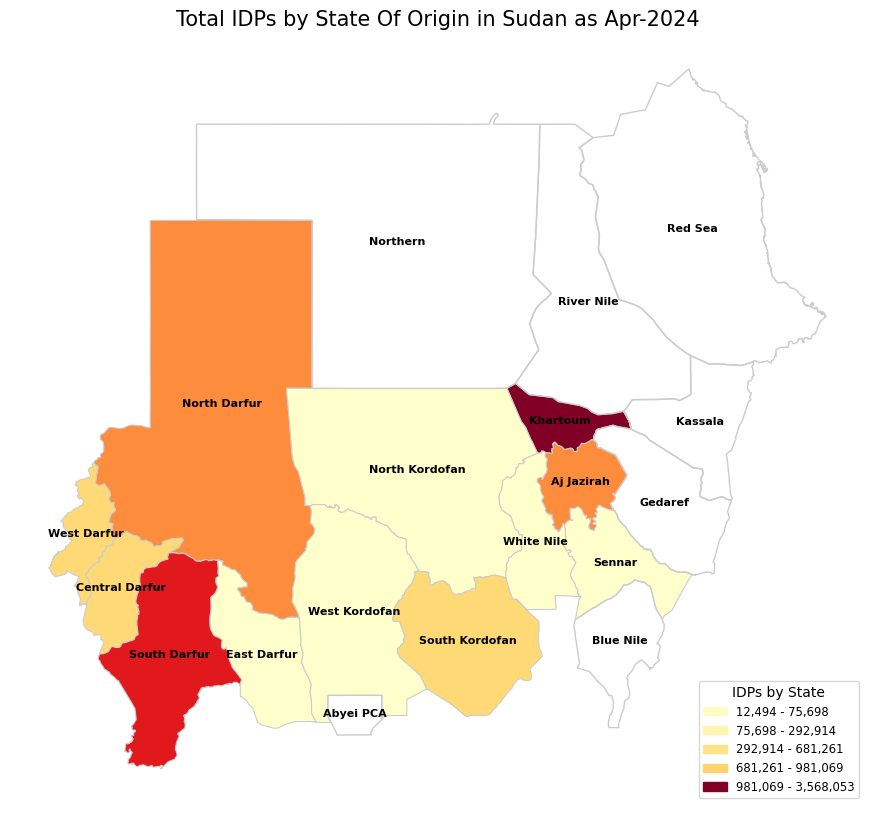

In [21]:
# Perform Natural Breaks (Jenks) classification
classifier = mc.NaturalBreaks(merged_gdf['IDPs_by_State_Of_Origin'].fillna(0), k=5)
merged_gdf['jenks_bins'] = classifier.yb

# Get the bin edges for the legend
bin_edges = classifier.bins

# Create the colormap
cmap = plt.get_cmap('YlOrRd')
norm = plt.Normalize(vmin=merged_gdf['IDPs_by_State_Of_Origin'].min(), vmax=merged_gdf['IDPs_by_State_Of_Origin'].max())

# Plot the graduated color map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#merged_gdf.plot(column='jenks_bins', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Plot the states with values
merged_gdf[merged_gdf['IDPs_by_State_Of_Origin'].notna()].plot(column='jenks_bins', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Plot the states without values as no fill
merged_gdf[merged_gdf['IDPs_by_State_Of_Origin'].isna()].plot(color='none', edgecolor='0.8', linewidth=1, ax=ax)
# Create custom legend patches
patches = [Patch(color=cmap(norm(bin_edges[i])), label=f'{int(bin_edges[i-1] if i > 0 else merged_gdf["IDPs_by_State_Of_Origin"].min()):,} - {int(edge):,}') for i, edge in enumerate(bin_edges)]

# Add the legend
ax.legend(handles=patches, loc='lower right', fontsize='small', title='IDPs by State')

# Add a title and turn off the axis
ax.set_title('Total IDPs by State Of Origin in Sudan as Apr-2024', fontsize=15)
ax.axis('off')

# Add State names to the map
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['ADM1_EN']):
    ax.text(x, y, label, fontsize=8,fontweight='bold', ha='center', va='center')
#save the map as jpg
plt.savefig('Total IDPs by State Of Origin in Sudan as Apr-2024.jpg', format='jpg', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()


In [22]:
#Preparing for calculating total IDPs by State of displacement

Total_idps_From_State_Origin_selected_month = df_selected_year_month.groupby(['State_Of_Origin','State_Of_Displacement']).agg({
'IDPs_by_State_Of_Origin': 'sum'    
}).reset_index()

Total_idps_From_State_Origin_selected_month=Total_idps_From_State_Origin_selected_month.rename(columns={'State_Of_Origin':'From State','State_Of_Displacement':'To State','IDPs_by_State_Of_Origin':'IDPs'})

Total_idps_From_State_Origin_selected_month

,From State,To State,IDPs
0,Aj Jazirah,Aj Jazirah,170306
1,Aj Jazirah,Blue Nile,24110
2,Aj Jazirah,Central Darfur,0
3,Aj Jazirah,East Darfur,400
4,Aj Jazirah,Gedaref,148688
...,...,...,...
211,White Nile,South Darfur,0
212,White Nile,South Kordofan,149
213,White Nile,West Darfur,0
214,White Nile,West Kordofan,0


In [23]:

# Your code for creating the heatmap here...

# Save the heatmap as a JPG file using altair_saver


# Create a pivot table to prepare the data for the heatmap
"""
pivot_table = pd.pivot_table(Total_idps_From_State_Origin_selected_month, 
                             values='IDPs', 
                             index='From State', 
                             columns='To State', 
                             aggfunc=np.sum,
                            fill_value=0).reset_index()
"""

# Convert the pivot table to a long format
#pivot_table_long = pivot_table.melt(id_vars='From State', var_name='To State', value_name='Number of IDPs')

# Enable dark theme
alt.themes.enable("dark")

# Create the heatmap using Altair
heatmap = alt.Chart(Total_idps_From_State_Origin_selected_month).mark_rect().encode(
    x=alt.X('To State:N', title='State Of Displacement'),
    y=alt.Y('From State:N', title='State State Of Origin'),
    color=alt.Color('IDPs:Q', scale=alt.Scale(scheme='yelloworangered'), title='Number of IDPs'),
    stroke=alt.value('black'),
    strokeWidth=alt.value(0.25),
    tooltip=['From State','To State','IDPs']
).properties(
    title='IDPs Movement as Apr-2024',
    width=600,
    height=400

).configure_title(
    fontSize=20,
    anchor='middle',
    color='white'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    labelColor='white',
    titleColor='white'
).configure_legend(
    labelFontSize=12,
    titleFontSize=14,
    labelColor='white',
    titleColor='white'
)

heatmap.display()


alt.Chart(...)